# Linear Regression Model building cheat Sheet _ Fuzail

## Initilizing notbook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

## loading dataset from SKLEARN 

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston_dataset = load_boston()

In [5]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## Crearting datafram from SKLEARN dataset

In [6]:
df = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [9]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [12]:
df['target']=boston_dataset.target

## checking co-relation of dataset

In [13]:
import seaborn as sns

<AxesSubplot:>

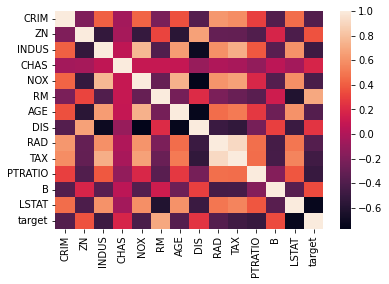

In [14]:
sns.heatmap(df.corr())

In [15]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## To Get the attributes/functions of any object

['ArtistList',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_

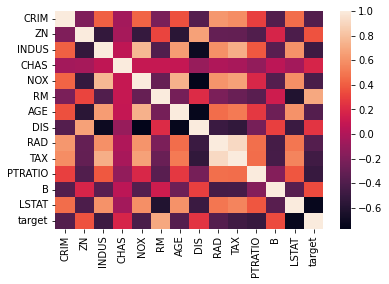

In [16]:
dir(sns.heatmap(df.corr()))

# ploting scatter charts

<AxesSubplot:xlabel='B', ylabel='target'>

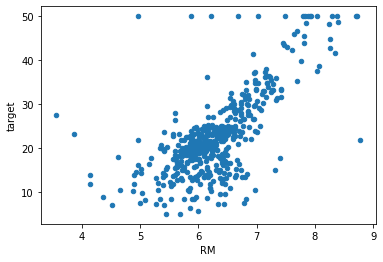

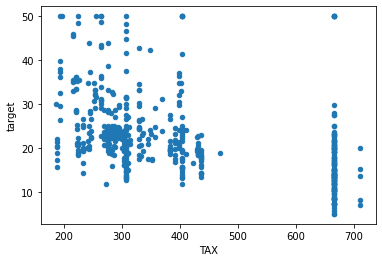

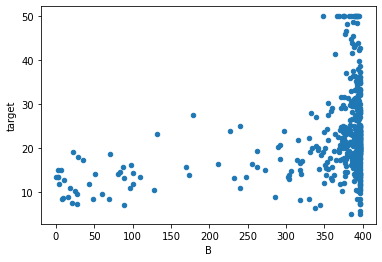

In [17]:
df.plot(kind='scatter',x='RM',y='target')
df.plot(kind='scatter',x='TAX',y='target')
df.plot(kind='scatter',x='B',y='target')

### removing target from the dataframe

In [18]:
feature_column = ['RM']
x = df.drop(['target'], axis=1)
y = df.target

## Initilizing train test split for model input from SKLEARN lib

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

## Initilizing LinearRegression model from SKLEARN lib

In [29]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()
lm2 = LinearRegression()

### Model fitting to calculate intercept and coeffiecents based on splited Training data 

In [30]:
sk_model_1 = lm1.fit(X_train,y_train)

In [31]:
sk_model_2 = lm2.fit(X_train[['INDUS', 'CHAS', 'AGE']],y_train)

In [32]:
sk_model_1.intercept_

37.32154212541589

In [33]:
sk_model_2.intercept_

30.880781771679796

In [34]:
sk_model_1.coef_

array([-1.11388330e-01,  4.47558733e-02, -4.51706138e-02,  1.95426599e+00,
       -1.64932688e+01,  3.64081143e+00,  7.21200964e-03, -1.52290131e+00,
        3.36404260e-01, -1.45088176e-02, -9.32683598e-01,  8.97543948e-03,
       -5.02725554e-01])

In [35]:
sk_model_2.coef_

array([-0.58962183,  7.57152426, -0.03476077])

### Model prediction based on Test Training data 

In [41]:
predicted_values_1 = sk_model_1.predict(X_test)

In [42]:
predicted_values_2 = sk_model_2.predict(X_test[['INDUS', 'CHAS', 'AGE']])

In [43]:
predicted_values_1

array([10.00376482, 23.43523897, 24.97427528, 21.49513418, 35.087565  ,
       14.4073179 , 19.53619664, 19.05985671, 27.75456432, 17.46204576,
       14.58406759, 20.1053761 , 36.24481005, 23.76497262, 16.33666771,
       20.04301995, 28.23656578, 11.3120847 , 15.83752045, 22.40804802,
       22.43870432, 14.02359736, 19.9263803 , 32.30256753, 22.55245086,
       27.59507183, 23.04764447,  7.5166162 , 26.13123837, 19.31598931,
       21.3574126 ,  8.47827666, 28.07099631, 24.93339977, 35.83055122,
       25.51079562, 39.48633873,  2.31693321, 31.49374242, 32.59170008,
       19.53631358, 21.99811248, 17.22889357, 31.08987315, 18.82675489,
       18.4344953 , 28.68498327, 28.22378217, 18.42883189, 22.09920102,
       42.71604042, 16.17923339, 27.80491805, 35.20872021, 16.35959907,
       31.2972707 ,  6.02955375, 13.53746555, 18.76542575, 19.79916844,
       14.26765114, 18.28220829, 36.95961088, 35.63832362, 17.984269  ,
       12.91788898, 38.7813029 , 36.25991168, 14.47124049, 19.57

In [44]:
predicted_values_2

array([23.49379311, 27.99883755, 17.85879831, 18.40454248, 26.63419327,
       16.77078606, 17.32348238, 24.60936544, 17.53204703, 18.53315734,
       17.54942742, 16.98977894, 29.1381053 , 25.41648481, 16.89244878,
       22.86504876, 19.73279265, 24.29603102, 16.86464016, 17.14967851,
       21.03792277, 28.99334311, 28.63640907, 27.00422627, 20.726256  ,
       20.68336286, 26.31686028, 17.24005652, 16.02676062, 22.71323556,
       25.96674726, 16.79859468, 27.7113722 , 26.56486258, 16.17970803,
       23.35517569, 34.76125484, 16.73254921, 27.14875159, 24.44774054,
       24.686442  , 29.00674352, 17.34086277, 28.38361249, 14.55349972,
       16.76383391, 25.88564954, 26.50704147, 14.53959541, 12.6841294 ,
       28.19172656, 29.07676897, 26.30135009, 26.53473954, 24.80901574,
       27.57580518, 17.09753735, 14.56045188, 22.61242932, 23.94664712,
       17.49381018, 16.73254921, 27.48088142, 25.06390564, 17.21572398,
       14.55349972, 26.67527111, 15.99199985, 17.15315459, 23.14

## Evaluation of model based on SKLEARN performance matrix 

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [47]:
Pred_r2_skl_lm_1 = r2_score(y_test,predicted_values_1)

In [50]:
Pred_r2_skl_lm_1

0.7467438556481061

In [48]:
mean_absolute_error(y_test,predicted_values_1)

3.5312452092105553

In [49]:
Pred_r2_skl_lm_2 = r2_score(y_test,predicted_values_2)

In [51]:
Pred_r2_skl_lm_2

0.24790468175287272

In [52]:
mean_absolute_error(y_test,predicted_values_2)

6.423942844039584

## Initiating Stats Model (sm) to evaluate P and T values to see the significence of variables as per null and alternative hypothesis

In [53]:
import statsmodels.api as sm

In [54]:
x_1 = X_train

In [55]:
y_1 = y_train

### Add constant as required by sm

In [57]:
x_1 = sm.add_constant(x_1)

### initilizing sm Linear Reg model and fiting

In [58]:
model = sm.OLS(y_1,x_1)

In [59]:
results = model.fit()

In [60]:
model_2 = sm.OLS(y_1,x_1[['INDUS', 'CHAS', 'AGE']])

In [61]:
results_2 = model_2.fit()

In [62]:
results.params

const      37.321542
CRIM       -0.111388
ZN          0.044756
INDUS      -0.045171
CHAS        1.954266
NOX       -16.493269
RM          3.640811
AGE         0.007212
DIS        -1.522901
RAD         0.336404
TAX        -0.014509
PTRATIO    -0.932684
B           0.008975
LSTAT      -0.502726
dtype: float64

In [63]:
results_2.params

INDUS   -0.461087
CHAS     9.324273
AGE      0.329296
dtype: float64

### Identification of significant P Values variables

In [64]:
results.pvalues

const      1.013350e-09
CRIM       1.457147e-03
ZN         6.232638e-03
INDUS      5.322454e-01
CHAS       6.546658e-02
NOX        3.517071e-04
RM         7.446270e-13
AGE        6.443620e-01
DIS        4.743469e-10
RAD        3.147905e-05
TAX        1.345537e-03
PTRATIO    1.463854e-08
B          8.072574e-03
LSTAT      6.192560e-15
dtype: float64

In [65]:
results_2.pvalues

INDUS    1.679801e-03
CHAS     2.443836e-03
AGE      4.147673e-31
dtype: float64

In [66]:
Imp_column = results.pvalues.where(results.pvalues>=0.05)

In [67]:
Imp_column = Imp_column[~Imp_column.isna()]

In [68]:
for y,u in enumerate(Imp_column):
    print(u)

0.5322454199496003
0.06546658286611319
0.6443620477984127


In [69]:
Imp_elements = []
for element in Imp_column.index[:]:
    Imp_elements = Imp_elements + [element]
Imp_elements
    

['INDUS', 'CHAS', 'AGE']

In [70]:
x_1[Imp_elements]

,INDUS,CHAS,AGE
191,3.44,0.0,30.8
3,2.18,0.0,45.8
275,6.41,0.0,42.8
386,18.10,0.0,100.0
146,19.58,0.0,100.0
...,...,...,...
32,8.14,0.0,82.0
380,18.10,0.0,91.9
131,21.89,0.0,97.7
414,18.10,0.0,100.0


In [71]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     72.05
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           2.72e-89
Time:                        15:00:51   Log-Likelihood:                -1041.9
No. Observations:                 354   AIC:                             2112.
Df Residuals:                     340   BIC:                             2166.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3215      5.940      6.284      0.000      25.639      49.005
CRIM          -0.1114      0.035     -3.209      0.001      -0.180      -0.043
ZN             0.0448      0.016      2.752      0.006       0.013       0.077
INDUS         -0.0452      0.072     -0.625      0.532      -0.187       0.097
CHAS           1.9543      1.057      1.848      0.065      -0.126       4.034
NOX          -16.4933      4.568     -3.610      0.000     -25.479      -7.508
RM             3.6408      0.488      7.457      0.000       2.680       4.601
AGE            0.0072      0.016      0.462      0.644      -0.023       0.038
DIS           -1.5229      0.237     -6.414      0.000      -1.990      -1.056
RAD            0.3364      0.080      4.219      0.000       0.180       0.493
TAX           -0.0145      0.004     -3.233      0.001      -0.023      -0.006
PTRATIO       -0.9327      0.161     -5.807      0.000      -1.249      -0.617
B              0.0090      0.003      2.665      0.008       0.002       0.016
LSTAT         -0.5027      0.062     -8.169      0.000      -0.624      -0.382
==============================================================================
Omnibus:                      160.034   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1016.345
Skew:                           1.790   Prob(JB):                    2.01e-221
Kurtosis:                      10.489   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Get sm Summary for model evaluation

In [72]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.661
Model:                            OLS   Adj. R-squared (uncentered):              0.658
Method:                 Least Squares   F-statistic:                              228.5
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                    3.65e-82
Time:                        15:00:52   Log-Likelihood:                         -1438.5
No. Observations:                 354   AIC:                                      2883.
Df Residuals:                     351   BIC:                                      2895.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INDUS         -0.4611      0.146     -3.166      0.002      -0.748      -0.175
CHAS           9.3243      3.055      3.052      0.002       3.316      15.332
AGE            0.3293      0.026     12.816      0.000       0.279       0.380
==============================================================================
Omnibus:                       25.052   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.413
Skew:                           0.369   Prob(JB):                     0.000450
Kurtosis:                       2.293   Cond. No.                         303.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
predicted_values2 = results.predict()

In [74]:
predicted_values3 = results_2.predict()

In [75]:
predicted_values2

array([29.72513208, 28.65316007, 33.51253914,  6.58123042, 16.00688358,
       17.25798424, 21.8918502 , 11.70155317, 23.84350562, 21.73948161,
       21.70136034, 20.30214382, 24.66840127, 20.42738538, 20.9924678 ,
       33.05608378, 25.15212113, 23.87422804, 20.71900802, 25.32554513,
       28.94861913, 20.62798632, 11.90407573, 25.01448389, 39.73630498,
       34.52949063, 20.52034387, 18.39142166, 18.11147122, 16.30846574,
       20.71026043, 25.78886722, 33.78413336, 26.92306117, 16.87397994,
       13.89659328, 12.23625402, 13.67392872, 11.76563959, 28.56442141,
       22.10462651, 18.50861134, 23.84292185, 30.15912681, 24.31039617,
       20.19049854, 23.30983196, 23.81415859, 26.99784946, 31.17219777,
       31.70682483, 12.16282122, 17.90187484, 36.00263391, 24.95580198,
       20.22949333, 13.07944444, 12.38535118, 30.05543185, 23.49866175,
       37.07703321, 28.14938824, 18.35762815, 32.52299479,  4.15785262,
       40.4802717 , 16.05413557, 22.03863887, 12.81808686, 15.00

In [76]:
predicted_values3

array([ 8.55618804, 14.07660246, 11.13831593, 24.58396021, 23.90155161,
       23.59607122, 16.8707943 , 23.69486012, -2.41583792, 10.78436475,
       25.68976586,  4.92496935,  7.20799773, 19.4560819 , 25.97614922,
        6.90498748, 21.58648341, 23.01245152, 13.31406981, 23.90155161,
       33.34675704,  9.56009166, 24.58396021, -0.35927706, 24.47285661,
       23.17265822,  7.77945735, 23.90155161, 25.61998529,  5.31274525,
        4.24814402, 21.36037065,  3.84267568,  0.295353  , 22.7728304 ,
       23.89243792, 29.30087911, 24.58396021, 23.46435269,  5.58602158,
       22.15750546, 24.96872574,  4.16997534, 20.40500996, 17.56395311,
       14.04439841, 19.2585041 , 36.53028927,  2.15836541,  2.26012866,
       32.05185919, 27.2335373 , 22.83868967, 22.67123666, 23.89243792,
       24.18880462, 23.26677489, 23.90155161, 23.74840469, 17.25360975,
       31.09911798,  8.79054474, 20.50068573, 23.04538116, 22.83644089,
       10.32538257, 22.1449186 , 15.86694255, 22.08130811, 24.58

## Evaluation of model based on Stats Model (sm) performance matrix 

In [77]:
Pred_r2_sm_lm_1 = results.rsquared

In [78]:
Pred_r2_sm_lm_2 = results_2.rsquared

In [79]:
Pred_r2_sm_lm_1 

0.7336888050549404

In [80]:
Pred_r2_sm_lm_2

0.6613300177415593

#### get variable name Random matrix and dummies

In [83]:
f'{Pred_r2_sm_lm_1=}'.split('=')

['Pred_r2_sm_lm_1', '0.7336888050549404']

In [84]:
np.random.seed(30)
numbs = np.random.rand(10,2)

In [85]:
numbs.mean()

0.501657048437759

In [86]:
numbs

array([[0.64414354, 0.38074849],
       [0.66304791, 0.16365073],
       [0.96260781, 0.34666184],
       [0.99175099, 0.2350579 ],
       [0.58569427, 0.4066901 ],
       [0.13623432, 0.54413629],
       [0.51817635, 0.76685511],
       [0.93385014, 0.08970338],
       [0.19577126, 0.99419368],
       [0.2351805 , 0.23898637]])

In [87]:
numbs2 = np.random.rand(10)

In [88]:
numbs2 

array([0.62909983, 0.73495258, 0.68834438, 0.03113075, 0.90251384,
       0.28643533, 0.55561256, 0.37642024, 0.02662436, 0.49414912])

In [89]:
area = ['urban','rural','suburban','dense','urban','rural','suburban','dense','urban','rural','suburban','dense']

In [90]:
area_df=pd.DataFrame(data=np.array(area), columns=["Area"])

In [91]:
area_df

,Area
0,urban
1,rural
2,suburban
3,dense
4,urban
5,rural
6,suburban
7,dense
8,urban
9,rural


In [92]:
area_df_dummies = pd.get_dummies(data=area_df, drop_first=True, prefix='test')

In [93]:
area_df = pd.concat([area_df,area_df_dummies], axis=1)

In [94]:
area_df

,Area,test_rural,test_suburban,test_urban
0,urban,0,0,1
1,rural,1,0,0
2,suburban,0,1,0
3,dense,0,0,0
4,urban,0,0,1
5,rural,1,0,0
6,suburban,0,1,0
7,dense,0,0,0
8,urban,0,0,1
9,rural,1,0,0
